In [1]:
import json
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [2]:
font = {'size'   : 20}

matplotlib.rc('font', **font)

$a_{c1}, n_{c1}$ randomized: Show that $\Delta d_p^*$ is always positive but not additive.

In [3]:
with open('data/singlecoat_a_1_n_1_randomized.json', 'r') as f:
    data = json.load(f)
    
df = pd.DataFrame(data)

n_1 = df.n_1
a_1 = df.a_1*1e3

delta_d = 1e3*(df['a_p*1'] - df['a_p*0'])*2
delta_n = 1e3*(df['n_p*1'] - df['n_p*0'])

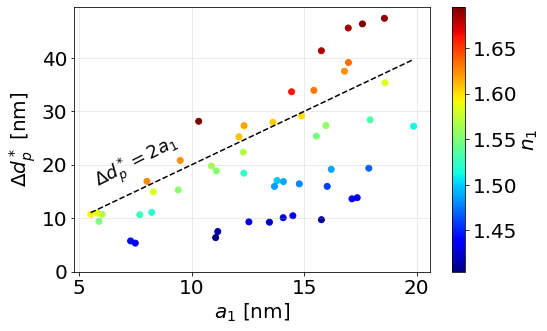

In [4]:
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:red'
ax1.set_xlabel('$a_1$ [nm]')
ax1.set_ylabel('$\Delta d_p^*$ [nm]')
ct = ax1.scatter(a_1, delta_d, c = n_1, cmap='jet')
ax1.tick_params(axis='y')
cb = fig.colorbar(ct, ax=ax1)
cb.set_label('$n_1$')
#ax1.hlines(0, 5, 20, linestyle = 'dashed')
a_sort = np.sort(a_1)
ax1.plot(a_sort, 2*a_sort, linestyle = 'dashed', c='k')
ax1.text(5.5, 16, r'$\Delta d_p^* = 2 a_1$', fontsize=18, 
         rotation=27)
ax1.set_yticks([0, 10, 20, 30, 40])
ax1.grid(alpha=0.3)


fig.tight_layout()
plt.show()

fig.savefig('figures/a_1_vs_delta_d_p.png')

$a_{c}$ fixed, $n_{c}$ randomized: Show that $\Delta d_p^*$ now responds linearly. Fit to line.

In [7]:
with open('data/singlecoat_a_1_fixed_n_1_randomized.json', 'r') as f:
    data = json.load(f)
    
df = pd.DataFrame(data)

n_1 = df.n_1
a_1 = df.a_1*1e3

delta_d = 1e3*(df['a_p*1'] - df['a_p*0'])*2
delta_n = 1e3*(df['n_p*1'] - df['n_p*0'])

m, b = np.polyfit(n_1, delta_d, 1)
delta_d_fit = m*n_1 + b

n_1_sort, delta_d_fit = zip(*sorted(zip(n_1, delta_d_fit)))
print(m*1.34 + b)
print(m*1.6 + b)

0.5690978765723855
19.48481448506834


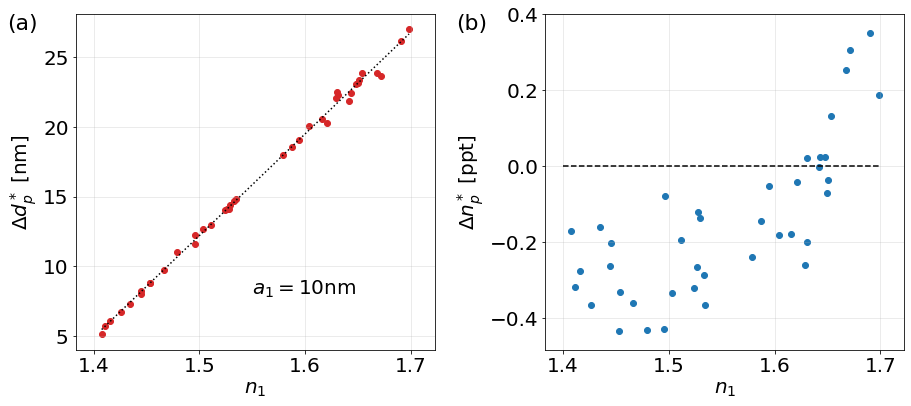

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (13,6))

color = 'tab:red'
ax1.set_xlabel('$n_1$')
ax1.set_ylabel('$\Delta d_p^*$ [nm]')
ax1.scatter(n_1, delta_d, color=color)
ax1.text(1.55, 8, '$a_1 = 10$nm', fontsize=20)
ax1.grid(alpha=0.3)
ax1.plot(n_1_sort, delta_d_fit, linestyle = 'dotted', c='k')
ax1.set_xticks([1.4, 1.5, 1.6, 1.7])
#ax1.text(0.05, 0.9, '(a)', transform=ax1.transAxes)

color = 'tab:blue'
ax2.set_ylabel('$\Delta n_p^*$ [ppt]')
ax2.scatter(n_1, delta_n, color=color)

ax2.set_xlabel('$n_1$')
ax2.grid(alpha=0.3)
ax2.set_xticks([1.4, 1.5, 1.6, 1.7])
#ax2.text(0.05, 0.9, '(b)', transform=ax2.transAxes)
ax2.hlines(0, 1.4, 1.7, linestyle='dashed')

letters = [r'(a)', r'(b)']
for n in range(2):
    fig.text(0.48*n + 0.02,0.9, letters[n], fontsize=22)

fig.tight_layout(pad=1)
plt.show()

fig.savefig('figures/single_coat_fitdifference_2panel.png')